<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/football_match_actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_addons

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import utils
from tensorflow.keras.metrics import Recall,Precision
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
def image_reader(dir):
  lst=[]
  for image in os.listdir(dir):
    if "png" in image or "jpg" in image or "jpeg" in image or "PNG" in image or "JPG" in image or "JPEG" in image :
          img=cv.imread(dir+image)
          try:
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(300,300))
          except:
            print(image)
          lst.append(img)
  return np.array(lst)
def data_set_1(dir):
  data_set=dict()
  goals=image_reader(dir+"goals/")
  tackles=image_reader(dir+"tackles/")
  red_cards=image_reader(dir+"red cards/")
  data_set[1]=goals#goals
  data_set[2]=tackles#tackles
  data_set[3]=red_cards#red_cards 
  dataset=np.concatenate((goals,tackles,red_cards))
  return data_set,dataset

In [ ]:
training_data_set_dict,training_data_set_lst=data_set_1("/content/drive/MyDrive/football match dataset first version/images/")
print(training_data_set_dict.keys())

dict_keys([1, 2, 3])


In [ ]:
def show(class_name,class_num):
  print(class_name)
  for i in range(0,10):
    plt.imshow(training_data_set_dict[class_num][i],cmap="gray")
    plt.show()
    print(training_data_set_dict[class_num][i].shape)

goals


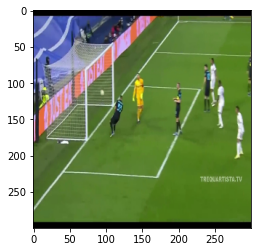

(300, 300, 3)


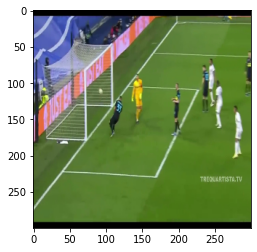

(300, 300, 3)


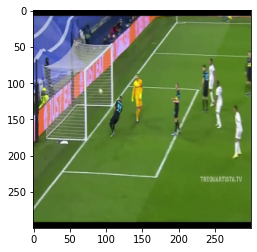

(300, 300, 3)


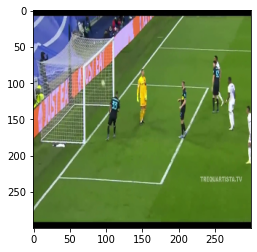

(300, 300, 3)


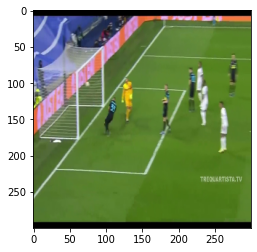

(300, 300, 3)


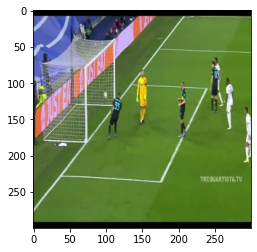

(300, 300, 3)


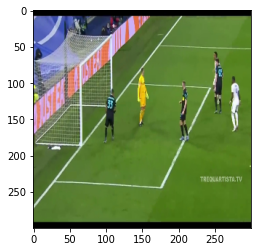

(300, 300, 3)


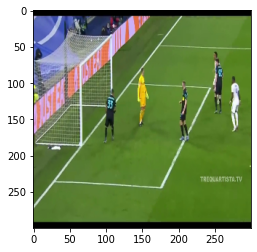

(300, 300, 3)


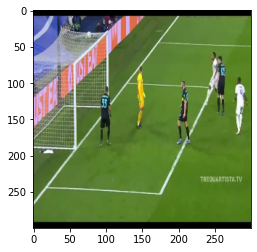

(300, 300, 3)


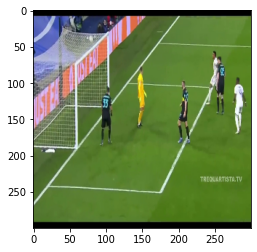

(300, 300, 3)


In [ ]:
show("goals",1)

tackles


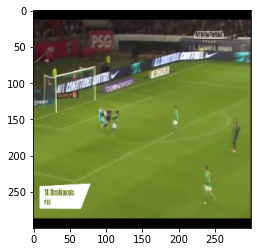

(300, 300, 3)


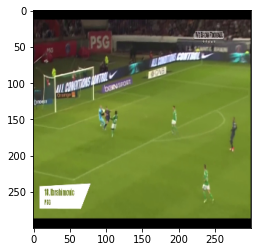

(300, 300, 3)


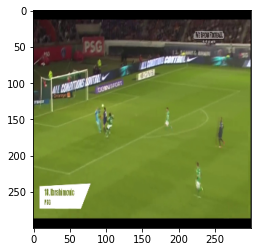

(300, 300, 3)


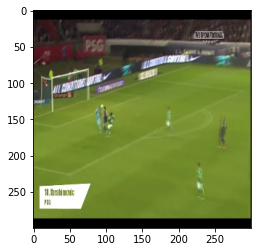

(300, 300, 3)


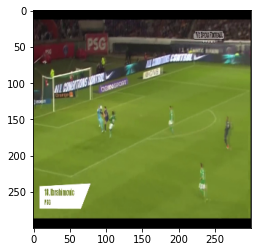

(300, 300, 3)


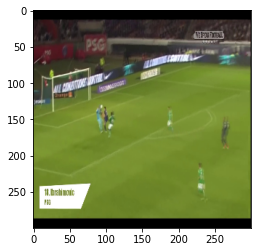

(300, 300, 3)


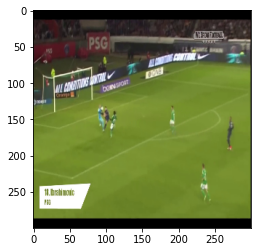

(300, 300, 3)


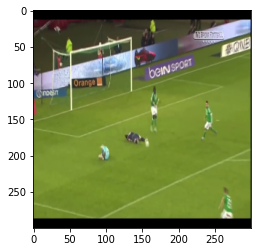

(300, 300, 3)


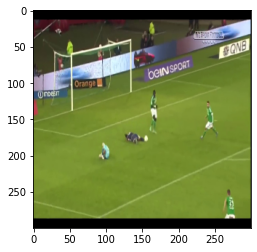

(300, 300, 3)


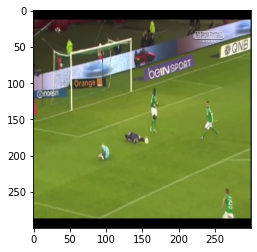

(300, 300, 3)


In [ ]:
show("tackles",2)

red cards


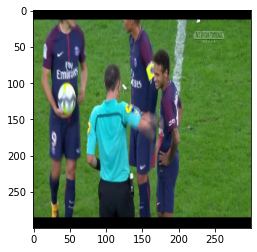

(300, 300, 3)


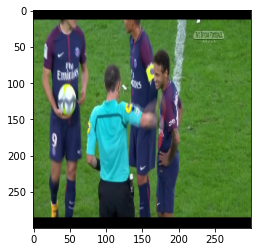

(300, 300, 3)


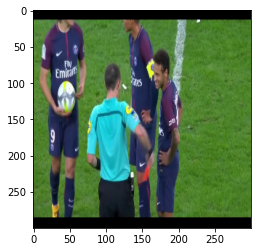

(300, 300, 3)


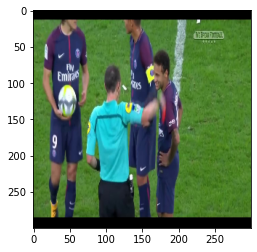

(300, 300, 3)


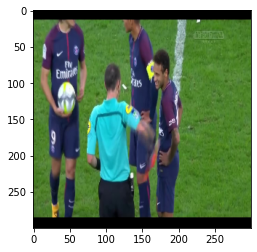

(300, 300, 3)


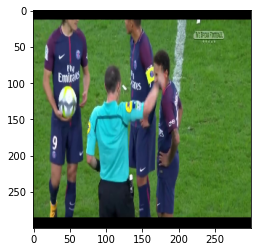

(300, 300, 3)


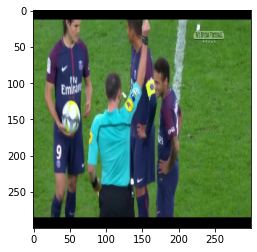

(300, 300, 3)


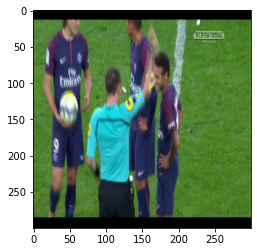

(300, 300, 3)


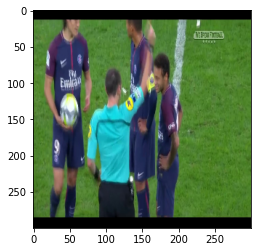

(300, 300, 3)


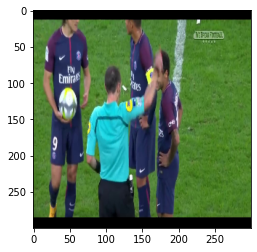

(300, 300, 3)


In [ ]:
show("red cards",3)

In [ ]:
counter_1=len(training_data_set_dict[1])
counter_2=len(training_data_set_dict[2])
counter_3=len(training_data_set_dict[3])
data_set_size=counter_1+counter_2+counter_3

In [ ]:
print(counter_1)
print(counter_2)
print(counter_3)

8682
202
698


In [ ]:
print(training_data_set_lst.shape)

(9582, 300, 300, 3)


In [ ]:
TRAINING_DIR="/content/drive/MyDrive/football match dataset first version/images/"
train_datagen2 = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen2.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(250,250),
                                                    shuffle=True,
                                                     batch_size=32,
                                                  subset="training",
                                                 )


validation_generator = train_datagen2.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(250,250),
    class_mode='categorical',
    subset='validation',
    shuffle=False) # set as validation data

Found 7667 images belonging to 3 classes.
Found 1915 images belonging to 3 classes.


In [ ]:
base_model = VGG16(weights = "imagenet", include_top=False,input_shape = (250,250, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = Flatten()(last_output)
x = Dense(64, activation='relu', name='FC_2')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax', name='softmax')(x)
new_model = Model(inputs=base_model.input, outputs=x)
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [ ]:
weight_class={
    0:data_set_size/(3*counter_1),
    1:data_set_size/(3*counter_2),
    2:data_set_size/(3*counter_3),
}

In [ ]:
new_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3,beta_1=0.9,beta_2=0.99,epsilon=1e-9),
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tfa.metrics.F1Score(num_classes=3)])

In [ ]:
history_1=new_model.fit(train_generator,
                  validation_data =validation_generator,
                  epochs=10,
                  batch_size=32,
                  use_multiprocessing=True,
                  shuffle=True,
                  class_weight=weight_class)

Epoch 1/10
240/240 [==============================] - 446s 2s/step - loss: 0.4978 - accuracy: 0.7455 - precision_1: 0.7712 - recall_1: 0.7034 - f1_score: 0.5093 - val_loss: 0.0770 - val_accuracy: 0.9734 - val_precision_1: 0.9754 - val_recall_1: 0.9713 - val_f1_score: 0.7979
Epoch 2/10
240/240 [==============================] - 369s 2s/step - loss: 0.1944 - accuracy: 0.9337 - precision_1: 0.9430 - recall_1: 0.9228 - f1_score: 0.7664 - val_loss: 0.0816 - val_accuracy: 0.9755 - val_precision_1: 0.9760 - val_recall_1: 0.9749 - val_f1_score: 0.8544
Epoch 3/10
240/240 [==============================] - 366s 2s/step - loss: 0.1118 - accuracy: 0.9587 - precision_1: 0.9634 - recall_1: 0.9532 - f1_score: 0.8406 - val_loss: 0.2057 - val_accuracy: 0.9384 - val_precision_1: 0.9451 - val_recall_1: 0.9342 - val_f1_score: 0.8091
Epoch 4/10
240/240 [==============================] - 365s 2s/step - loss: 0.1064 - accuracy: 0.9665 - precision_1: 0.9697 - recall_1: 0.9628 - f1_score: 0.8673 - val_loss: 0.

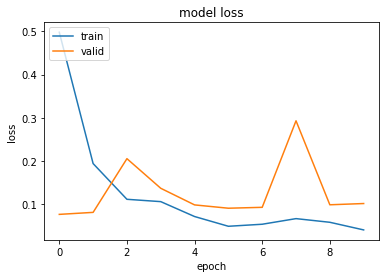

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

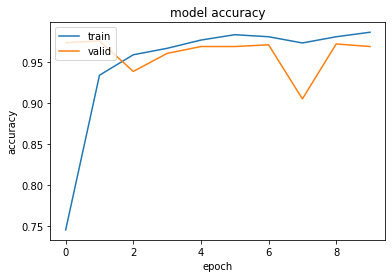

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples=1915  
Y_pred = new_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["goals","tackles","red cards"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))